<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/ML_Regresion_logistica_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicación de Machine Learning en el caso Titanic: Regresión Logística

El reto

El hundimiento del Titanic es uno de los naufragios más conocidos de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que supuso la muerte de 1502 de los 2224 pasajeros y de la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

##Referencias

https://www.kaggle.com/c/titanic

https://www.kaggle.com/showeed/starter-book-begginer-analysis/notebook

# Importar librerías

In [49]:
import pandas as pd

#Obtener los datos
Descargamos el fichero en local y lo subimos a Google Colab

https://www.kaggle.com/c/titanic/data?select=train.csv

In [50]:
#train_data = pd.read_csv("train.csv")
train_data = pd.read_csv("sample_data/train.csv")


Examinamos los datos cargados

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Información de los campos o features ("características")

"PassengerId" es el número de pasajero

"Survived" indica si el pasajero sobrevivió (valor 1) o no sobrevivió (valor 0) al naufragio

"Pclass" es la clase: primera clase, segunda clase y tercera clase 

"Name" es el nombre del pasajero

"Sex" es el sexo del pasajero: male (masculino) o female (femenino)

"Age" es la edad del pasajero

"SibSp" es la abreviatura de "Siblings and Spouses" que se traduce como "Hermanos y Esposas" que se embarcaron con el pasajero

"Parch" es la abreviatura de "Parents and children", esto es, el número de padres / hijos que se embarcaron con el pasajero

"Ticket" es el código del billete

"Fare" es la tarifa o precio del billete

"Cabin" es el camarote del pasajero

"Embarked" es la inicial del puerto donde embarcó el pasajero: C = Cherbourg; Q = Queenstown; S = Southampton


Examinamos el contenido del DataFrame: 
- Datos no nulos
- Tipos de datos


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos ver que hay valores nulos en algunos campos o variables.

También vemos que hay campos con valores no numéricos como Name, Sex, Ticket, Cabin y Embarked

##¿Qué hacer con los valores nulos?

Veamos cuántos valores nulos hay:

In [53]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aquí podemos ver el número de valores que faltan en cada columna. Esos valores que faltan pueden causar un problema cuando los necesitemos

Tenemos varias opciones

- Eliminar todos los registros que tienen algún valor nulo -> Perdemos información

- Prescindir de las variables o atributos de las que no tenemos valores en todos los registros -> Perdemos información

- Rellenar los valores nulos con valores, por ejemplo, la media del valor si es numérico o el valor más frecuente si no es numérico -> No perdemos información pero añadimos información estimativa (no real)

Si eliminamos todos los registros que no tienen valor en el campo edad

In [54]:
train_data_2=train_data.dropna(subset=['Age'])

In [55]:
train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


El inconveniente es que perdemos la información de los registros incompletos y pueden ser muchos. 

Supongamos que eliminamos todos los registros incompletos...

In [56]:
train_data_3=train_data.dropna()

In [57]:
train_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Nos quedan solo 183 registros y hemos perdido mucha información!!!

Si rellenamos los valores nulos con el valor medio conservamos la información anterior aunque estamos introduciendo valores estimativos que puede distorsionar el original

Calculamos la media de edad de los pasajeros 

In [58]:
edad_media = train_data['Age'].mean()
edad_media

29.69911764705882

Y rellenamos los registros sin edad con la edad media del resto de pasajeros

In [59]:
train_data['Age']=train_data['Age'].fillna(edad_media)

Y así logramos tener una tabla de datos con menos valores nulos

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Para rellenar la edad podríamos ser más precisos si usamos datos estimados más elaborados como la media de edad de los pasajeros en función del género

In [61]:
train_data.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

O la media de edad en función del género y de la clase

In [62]:
train_data.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.141405
        2         28.748661
        3         24.068493
male    1         39.287717
        2         30.653908
        3         27.372153
Name: Age, dtype: float64

Del atributo Embarked hay solo dos valores nulos por lo que optamos por rellenar los nulos con el valor más frecuente o probable

In [63]:
train_data.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [64]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

Vamos a eliminar las varibles o atributos con muchos valores nulos: el atributo Cabin tiene 204 valores y 687 valores nulos (sin información)

In [65]:
del train_data['Cabin']

Y este es el dataframe resultante sin valores nulos

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#¿Qué hacer con los atributos no numéricos?

Para que nuestras máquinas funcionen debemos alimentarlos con números por lo que debemos convertir los atributos no numéricos o por categorías en atributos numéricos

La función get_dummies() de Pandas convierte variables o atributos de categorías en varias variables numéricas con valores 0 y 1

In [67]:
pd.get_dummies(train_data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Estas columnas tienen información redundante por lo que podemos eliminar una columna porque no aporta información

In [68]:
pd.get_dummies(train_data["Sex"],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Así creamos un atributo numérico a partir de un atributo no numérico o por categorías

In [69]:
genero = pd.get_dummies(train_data["Sex"],drop_first=True)

Hacemos lo mismo con el resto de atributos no numéricos

In [70]:
puerto = pd.get_dummies(train_data["Embarked"],drop_first=True)

In [71]:
puerto

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


En el caso del atributo Pclass aunque es numérico realmente se refiere a categorías por lo que aplicamos lo anterior

In [72]:
clase = pd.get_dummies(train_data["Pclass"],drop_first=True)
clase

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


Añadimos estas columnas a nuestro DataFrame

In [73]:
train_data = pd.concat([train_data,clase,genero,puerto],axis=1)

In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  2            891 non-null    uint8  
 12  3            891 non-null    uint8  
 13  male         891 non-null    uint8  
 14  Q            891 non-null    uint8  
 15  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(5)
memory usage: 81.0+ KB


Y eliminamos las columnas con datos por categorías

In [76]:
train_data.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   2         891 non-null    uint8  
 6   3         891 non-null    uint8  
 7   male      891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


Podemos ver las correlaciones entre todos los atributos porque ahora son todos numéricos

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [78]:
train_data.corr()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.093349,-0.322308,-0.543351,0.003650,-0.149683
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.006589,-0.281004,0.084153,-0.013855,-0.019336
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,-0.055932,0.092548,-0.114631,-0.026354,0.068734
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,-0.000734,0.015790,-0.245489,-0.081228,0.060814
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,-0.118557,-0.413333,-0.182333,-0.117216,-0.162184
2,0.093349,0.006589,-0.055932,-0.000734,-0.118557,1.000000,-0.565210,-0.064746,-0.127301,0.189980
3,-0.322308,-0.281004,0.092548,0.015790,-0.413333,-0.565210,1.000000,0.137143,0.237449,-0.015104
male,-0.543351,0.084153,-0.114631,-0.245489,-0.182333,-0.064746,0.137143,1.000000,-0.074115,0.119224
Q,0.003650,-0.013855,-0.026354,-0.081228,-0.117216,-0.127301,0.237449,-0.074115,1.000000,-0.499421
S,-0.149683,-0.019336,0.068734,0.060814,-0.162184,0.189980,-0.015104,0.119224,-0.499421,1.000000


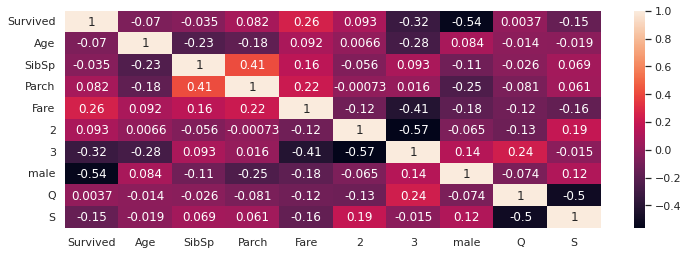

In [84]:
fig,ax = plt.subplots(figsize=(12,4))
sns.heatmap(train_data.corr(), annot=True)

#Modelo de predicción con Machine Learning

##Regresión Logística

El valor que queremos predecir es si el pasajero sobrevivió o no al naufragio por lo que solo hay dos resultados posibles. Tenemos por tanto un problema de Regresión Logística

Del dataset obtenemos los atributos y la variable a predecir

In [87]:
X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

Para saber si nuestro modelo de predicción es bueno debemos reservar una parte de los datos para posteriormente contrastar los resultados predecidos con los reales

Usaremos train_test_split del módulo cross_validation para dividir nuestros datos. El 70% de los datos serán datos de entrenamiento y el 30% serán datos de prueba.

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [92]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Comprobemos la precisión del modelo

In [96]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.66      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



Conseguimos un 79% de precisión, nada mal. Veamos la matriz de confusión

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[137,  17],
       [ 39,  75]])

Verdadero positivo: 137 (predijimos un resultado positivo y fue positivo)

Verdadero negativo: 75 (predijimos un resultado negativo y fue negativo)

Falso positivo: 17 (Predijimos un resultado positivo y fue negativo)

Falso negativo: 39 (Predijimos un resultado negativo y fue positivo)